In [30]:
import pandas as pd
df=pd.read_csv('D:/practices/aggregate_covid_country.csv')

In [31]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
23683,2020-05-26,West Bank and Gaza,429,365,3
23684,2020-05-26,Western Sahara,9,6,1
23685,2020-05-26,Yemen,249,10,49
23686,2020-05-26,Zambia,920,336,7


In [45]:
df.keys()

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths'], dtype='object')

In [53]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [54]:
df['Country']=le.fit_transform(df['Country'])
df['Country']


0          0
1          1
2          2
3          3
4          4
        ... 
23683    183
23684    184
23685    185
23686    186
23687    187
Name: Country, Length: 23688, dtype: int32

EDA

In [56]:
#Target variable is Deaths so let us check correlation of every column with target
df.corr()

,Country,Confirmed,Recovered,Deaths
Country,1.000000,0.069204,0.019298,0.064954
Confirmed,0.069204,1.000000,0.810991,0.929718
Recovered,0.019298,0.810991,1.000000,0.778094
Deaths,0.064954,0.929718,0.778094,1.000000


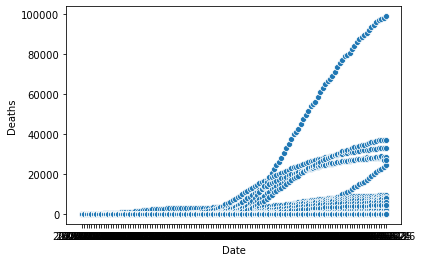

In [34]:
import seaborn as sns
sns.scatterplot(x="Date",y="Deaths",data=df)

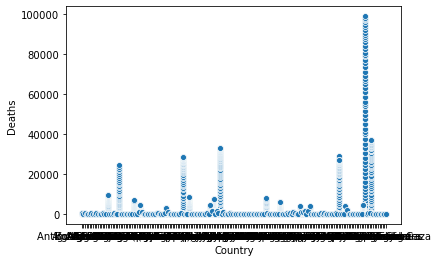

In [35]:
sns.scatterplot(x="Country",y="Deaths",data=df)

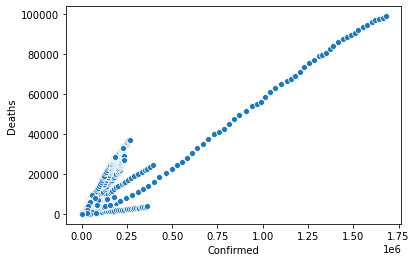

In [36]:
sns.scatterplot(x="Confirmed",y="Deaths",data=df)

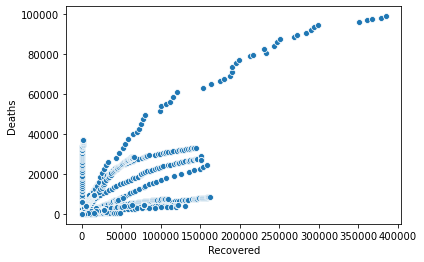

In [37]:
sns.scatterplot(x="Recovered",y="Deaths",data=df)

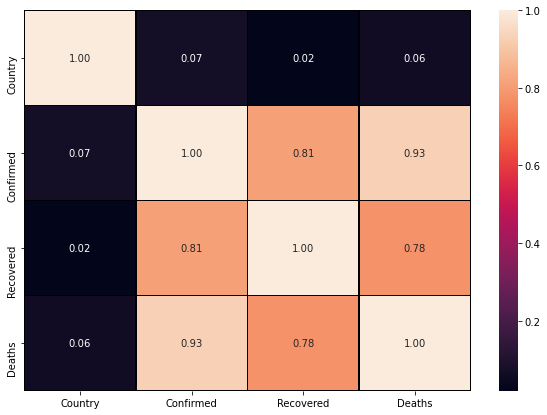

In [55]:
#lets plot a heatmap showing the correlation between columns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor="black",fmt='.2f')

Analysis : we can see that Country is weakly correlated with deaths as 6 percent, as confirmed cases are hghly correlated of 93 percent

In [57]:
df.describe()

,Country,Confirmed,Recovered,Deaths
count,23688.000000,2.368800e+04,23688.000000,23688.000000
mean,93.500000,7.969368e+03,2581.801714,526.935030
std,54.271303,5.842109e+04,15143.101257,3992.815956
min,0.000000,0.000000e+00,0.000000,0.000000
25%,46.750000,0.000000e+00,0.000000,0.000000
50%,93.500000,1.800000e+01,1.000000,0.000000
75%,140.250000,7.300000e+02,123.000000,13.000000
max,187.000000,1.680913e+06,384902.000000,98913.000000


In [58]:
df.isnull().sum()#checking missing or null values

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

Analysis we can see that there are no missing values

Checking if there are any outliers through box plot

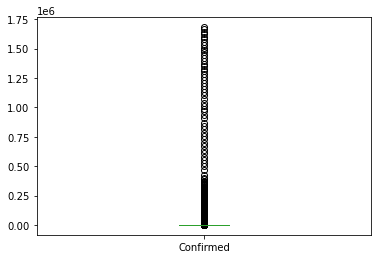

In [65]:
df["Confirmed"].plot.box()

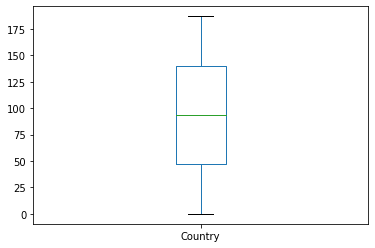

In [66]:
df["Country"].plot.box()

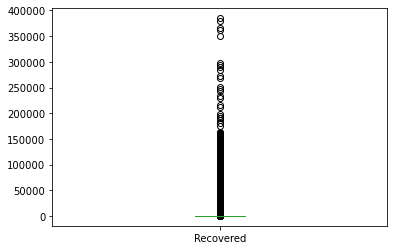

In [42]:
df["Recovered"].plot.box()

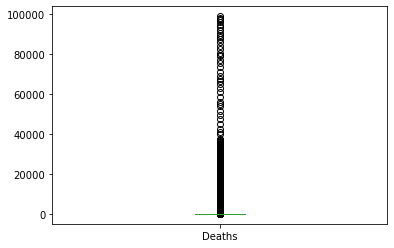

In [43]:
df["Deaths"].plot.box()

checking skewness

In [64]:
df.skew()

Country       0.000000
Confirmed    18.674502
Recovered    10.662286
Deaths       14.218167
dtype: float64

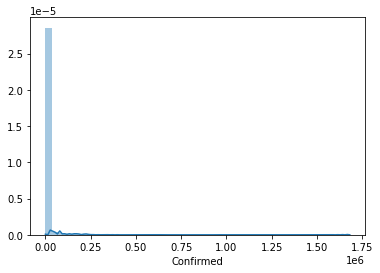

In [49]:
import seaborn as sns
sns.distplot(df["Confirmed"])

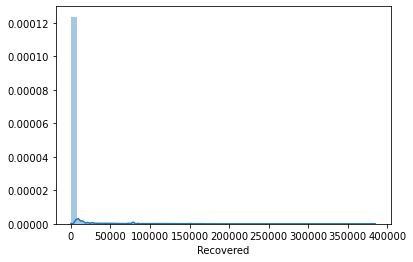

In [50]:
sns.distplot(df["Recovered"])

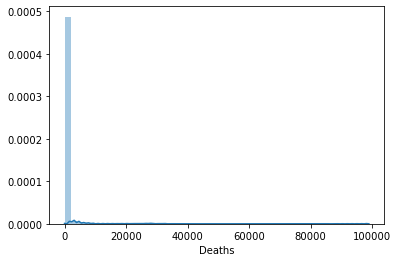

In [62]:
sns.distplot(df["Deaths"])

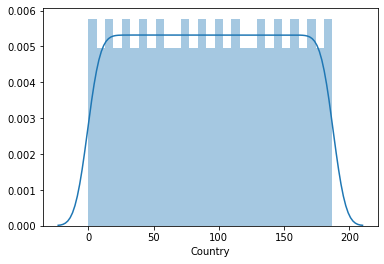

In [61]:
sns.distplot(df["Country"])

By checking skewness we can find that curves are not normalized.

Data Cleaning:

Outlier removal through Zscore:

In [72]:
df.dtypes

Date         object
Country       int32
Confirmed     int64
Recovered     int64
Deaths        int64
dtype: object

In [73]:
df=df.drop("Date",axis=1)

In [74]:
df

,Country,Confirmed,Recovered,Deaths
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
...,...,...,...,...
23683,183,429,365,3
23684,184,9,6,1
23685,185,249,10,49
23686,186,920,336,7


Outlier Removal through zscore

In [75]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(23688, 4)

In [76]:
threshold=3
print(np.where(z>3))

(array([ 7932,  8120,  8308,  8496,  8684,  8872,  9060,  9248,  9436,
        9624,  9812, 10000, 10188, 10376, 10564, 10752, 10940, 11128,
       11316, 11504, 11692, 11880, 12068, 12256, 12444, 12632, 12820,
       13008, 13146, 13196, 13245, 13334, 13384, 13433, 13522, 13572,
       13621, 13710, 13760, 13809, 13898, 13948, 13997, 14070, 14086,
       14136, 14185, 14258, 14274, 14274, 14324, 14373, 14446, 14462,
       14462, 14512, 14561, 14634, 14634, 14650, 14650, 14700, 14730,
       14749, 14822, 14822, 14838, 14838, 14888, 14914, 14918, 14937,
       15010, 15010, 15026, 15026, 15076, 15102, 15106, 15125, 15198,
       15198, 15214, 15214, 15264, 15290, 15294, 15313, 15386, 15386,
       15402, 15402, 15452, 15478, 15482, 15501, 15574, 15574, 15590,
       15590, 15594, 15640, 15666, 15670, 15685, 15689, 15762, 15762,
       15778, 15778, 15782, 15828, 15854, 15858, 15873, 15877, 15950,
       15950, 15966, 15966, 15966, 15970, 16016, 16042, 16046, 16061,
       16065, 16138

In [77]:
df_new=df[(z<3).all(axis=1)]

In [78]:
df_new.shape

(23177, 4)

In [79]:
loss_percent=(23688-23177)/23688*100
print(loss_percent)

2.157210401891253


As The loss percent is 2 it is considerable data loss through outliers

In [83]:
x=df.iloc[:,:-1]

In [84]:
x

,Country,Confirmed,Recovered
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0
...,...,...,...
23683,183,429,365
23684,184,9,6
23685,185,249,10
23686,186,920,336


In [86]:
y=df.iloc[:,-1]

In [87]:
y

0         0
1         0
2         0
3         0
4         0
         ..
23683     3
23684     1
23685    49
23686     7
23687     4
Name: Deaths, Length: 23688, dtype: int64

Removing Skewness Through Power Transform

In [88]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [89]:
x

array([[-2.10955906, -1.12525192, -0.93198832],
       [-2.05243114, -1.12525192, -0.93198832],
       [-2.00329407, -1.12525192, -0.93198832],
       ...,
       [ 1.52445822,  0.66622962,  0.30066897],
       [ 1.53874035,  0.9621308 ,  1.2176505 ],
       [ 1.55300066,  0.27996081,  0.60223114]])

The Data is now Skewed and Cleaned For model Building

In [ ]:
lr=L